In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'1.15.5'

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
import os
import shutil

# 定义源目录和目标目录
source_dir = '/mnt/workspace/data/fashion-mnist'
target_dir = '/root/.keras/datasets/fashion-mnist'

# 检查目标目录是否存在
if not os.path.exists(target_dir):
    # 如果目标目录不存在，则从源目录复制
    print(f"Directory {target_dir} does not exist. Copying from {source_dir}...")
    shutil.copytree(source_dir, target_dir)
    print(f"Copying completed.")
else:
    print(f"Directory {target_dir} already exists. No need to copy.")

Directory /root/.keras/datasets/fashion-mnist does not exist. Copying from /mnt/workspace/data/fashion-mnist...
Copying completed.


In [7]:
fashion_mnist_data = fashion_mnist.load_data()

In [8]:
len(fashion_mnist_data)

2

In [9]:
type(fashion_mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [10]:
p1 = fashion_mnist_data[0]

In [11]:
len(p1)

2

In [12]:
type(p1[1])

numpy.ndarray

In [13]:
p1[0].shape

(60000, 28, 28)

In [14]:
p1[1].shape

(60000,)

In [15]:
p1[1].dtype

dtype('uint8')

In [16]:
type(p1[1][0])

numpy.uint8

In [17]:
(train_data, train_label), (test_data, test_label) = fashion_mnist_data

In [18]:
len(train_data)

60000

In [19]:
len(test_data)

10000

In [20]:
len(test_label)

10000

In [21]:
valid_data, valid_label = train_data[-5000:], train_label[-5000:]

In [22]:
train_data_full, train_label_full = train_data, train_label

In [23]:
len(train_label_full)

60000

In [24]:
train_data, train_label = train_data_full[:-5000], train_label_full[:-5000]

In [25]:
len(train_data)

55000

In [26]:
len(train_label)

55000

In [27]:
train_data1 = train_data[0]

In [28]:
train_data1.shape

(28, 28)

In [29]:
import numpy as np
np.argmax(train_data1)

417

In [30]:
train_data1.shape

(28, 28)

In [31]:
28*28

784

In [32]:
np.max(train_data1.reshape(-1))

255

In [33]:
train_data_01, valid_data_01 = train_data/255.0, valid_data/255.0

In [34]:
np.max(train_data_01)

1.0

In [35]:
np.min(train_data_01)

0.0

In [36]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [37]:
class_names[train_label[0]]

'Ankle boot'

In [38]:
print(1)

1


In [39]:
train_data.shape

(55000, 28, 28)

In [40]:
type(train_data)

numpy.ndarray

In [41]:
keras

<module 'tensorflow.python.keras.api._v1.keras' from '/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v1/keras/__init__.py'>

In [42]:
model = keras.models.Sequential()

In [43]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [44]:
model.add(keras.layers.Dense(300, activation="relu"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [45]:
model.add(keras.layers.Dense(100, activation="relu"))

In [46]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.layers

In [49]:
hidden1 = model.layers[1]

In [50]:
hidden1.name

'dense'

In [51]:
model.get_layer('dense')

In [52]:
wights, bias = hidden1.get_weights()

2024-11-29 17:11:40.151107: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2024-11-29 17:11:40.171192: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2699995000 Hz
2024-11-29 17:11:40.173533: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3ac9310 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-11-29 17:11:40.173548: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [53]:
wights

array([[ 0.03525434,  0.0075706 , -0.06256079, ..., -0.05049804,
         0.06480139,  0.03020044],
       [ 0.0461904 ,  0.05209424, -0.06051292, ...,  0.01720127,
        -0.066048  , -0.05555169],
       [ 0.06805468, -0.00181955, -0.01651493, ...,  0.06192872,
         0.04611234,  0.05357376],
       ...,
       [ 0.06070128,  0.00776629,  0.0302009 , ..., -0.00547273,
         0.04471266, -0.01812559],
       [ 0.00858654, -0.00798521,  0.0566249 , ..., -0.06994484,
         0.02719321, -0.06186509],
       [ 0.03180012,  0.04359604,  0.02974019, ..., -0.02270986,
         0.07109809, -0.0526501 ]], dtype=float32)

In [54]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [55]:
import sys
print(sys.path)

['/mnt/workspace', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/opt/conda/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/root/.ipython']


In [56]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [57]:
# history = model.fit(train_data_01, train_label, epochs=30, validation_data=(valid_data_01, valid_label))

In [58]:
#import pandas as pd

In [59]:
#import matplotlib.pyplot as plt

In [60]:
# 将训练历史转换为DataFrame
# df = pd.DataFrame(history.history)
# # 设置图表大小
# plt.figure(figsize=(8, 5))
# # 绘制DataFrame中的数据
# df.plot()
# # 添加标题和标签
# plt.title('Model Training History')
# plt.xlabel('Epochs')
# plt.ylabel('Value')
# # 显示网格
# plt.grid(True)
# # 显示图表
# plt.show()

In [61]:
# model.save("keras_1128_fashion_recognize.h5")

In [62]:
model2 = keras.models.load_model('keras_1128_fashion_recognize.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [63]:
test_data.shape

(10000, 28, 28)

In [64]:
test_data[:3].shape

(3, 28, 28)

In [65]:
model2.predict(test_data[:3])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
predict_res = model2.predict(test_data[:3])

In [67]:
class_names[np.argmax(predict_res[1])]

'Pullover'

In [68]:
class_names[np.argmax(predict_res[0])],class_names[np.argmax(predict_res[1])],class_names[np.argmax(predict_res[2])]

('Ankle boot', 'Pullover', 'Trouser')

In [69]:
import zxlib

In [70]:
zxlib.greet('abc')

'Hello, abc!'

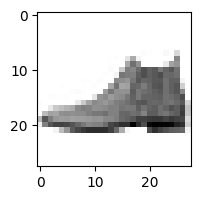

In [71]:
zxlib.paint(test_data[0])

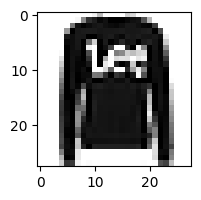

In [72]:
zxlib.paint(test_data[1])

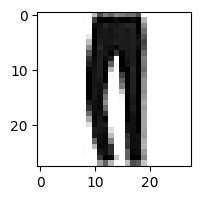

In [73]:
zxlib.paint(test_data[2])

In [74]:
import importlib

In [75]:
importlib.reload(zxlib)

<module 'zxlib' from '/mnt/workspace/zxlib.py'>

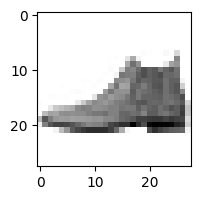

In [76]:
zxlib.paint(test_data[0])

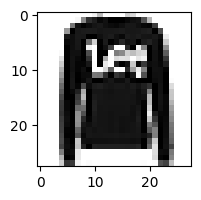

In [77]:
zxlib.paint(test_data[1])

In [78]:
from sklearn.datasets import fetch_california_housing

In [79]:
import sklearn

In [80]:
sklearn.__version__

'1.0.2'

In [81]:
housing = fetch_california_housing()

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
train_data_full, test_data, train_label_full, test_label = train_test_split(housing.data, housing.target)

In [85]:
train_data, valid_data, train_label, valid_label = train_test_split(train_data_full, train_label_full)

In [96]:
train_data.shape

(11610, 8)

In [86]:
scaler = StandardScaler()

In [87]:
train_data_scaled = scaler.fit_transform(train_data)

In [88]:
valid_data_scaled = scaler.transform(valid_data)

In [89]:
test_data_scaled = scaler.transform(test_data)

In [90]:
model_reg = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=train_data.shape[1:]),
    keras.layers.Dense(1)
])

In [91]:
model_reg.compile(loss="mean_squared_error", optimizer="sgd")

In [92]:
model_reg_history = model_reg.fit(train_data_scaled, train_label, epochs=20, 
                                  validation_data=(valid_data_scaled, valid_label))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 23us/sample - loss: 1.2559 - val_loss: 0.5265
Epoch 2/20
11610/11610 [==============================] - 0s 14us/sample - loss: 0.5149 - val_loss: 0.6310
Epoch 3/20
11610/11610 [==============================] - 0s 14us/sample - loss: 0.5033 - val_loss: 0.4540
Epoch 4/20
11610/11610 [==============================] - 0s 15us/sample - loss: 0.4672 - val_loss: 0.4372
Epoch 5/20
11610/11610 [==============================] - 0s 15us/sample - loss: 0.4512 - val_loss: 0.4266
Epoch 6/20
11610/11610 [==============================] - 0s 15us/sample - loss: 0.4335 - val_loss: 0.4130
Epoch 7/20
11610/11610 [==============================] - 0s 15us/sample - loss: 0.4232 - val_loss: 0.4089
Epoch 8/20
11610/11610 [==============================] - 0s 16us/sample - loss: 0.4187 - val_loss: 0.4066
Epoch 9/20
11610/11610 [==============================] - 0s 15us/sample - loss: 0.4128 - val_l

In [97]:
mse_test = model_reg.evaluate(test_data_scaled, test_label)

5160/5160 [==============================] - 0s 6us/sample - loss: 0.3809


In [95]:
train_data.shape[1:]

(8,)

In [98]:
train_data_03 = train_data[:3]

In [99]:
train_data_03

array([[ 2.44210000e+00,  9.00000000e+00,  3.34499314e+00,
         1.02057613e+00,  4.48600000e+03,  3.07681756e+00,
         3.41400000e+01, -1.18240000e+02],
       [ 2.12050000e+00,  1.60000000e+01,  5.57992565e+00,
         1.09851301e+00,  8.42000000e+02,  1.56505576e+00,
         3.31800000e+01, -1.17280000e+02],
       [ 4.13460000e+00,  2.60000000e+01,  5.62650602e+00,
         1.12048193e+00,  2.44000000e+02,  2.93975904e+00,
         3.74800000e+01, -1.21020000e+02]])

In [100]:
model_reg.predict(train_data_03)

array([[249.06268 ],
       [101.746254],
       [151.50803 ]], dtype=float32)